<a href="https://colab.research.google.com/github/jisshub/learning_python3/blob/master/news_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing libraries

In [0]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stopwords=set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# import dataset and return first n rows

In [1]:
!git clone https://github.com/jisshub/datasets_repo.git
!ls


Cloning into 'datasets_repo'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
datasets_repo  sample_data


In [0]:
news=pd.read_json('datasets_repo/News_Category_Dataset.json',lines=True)
news.head(10)

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."
5,Ron Dicker,ENTERTAINMENT,2018-05-26,Morgan Freeman 'Devastated' That Sexual Harass...,https://www.huffingtonpost.com/entry/morgan-fr...,"""It is not right to equate horrific incidents ..."
6,Ron Dicker,ENTERTAINMENT,2018-05-26,Donald Trump Is Lovin' New McDonald's Jingle I...,https://www.huffingtonpost.com/entry/donald-tr...,"It's catchy, all right."
7,Todd Van Luling,ENTERTAINMENT,2018-05-26,What To Watch On Amazon Prime That’s New This ...,https://www.huffingtonpost.com/entry/amazon-pr...,There's a great mini-series joining this week.
8,Andy McDonald,ENTERTAINMENT,2018-05-26,Mike Myers Reveals He'd 'Like To' Do A Fourth ...,https://www.huffingtonpost.com/entry/mike-myer...,"Myer's kids may be pushing for a new ""Powers"" ..."
9,Todd Van Luling,ENTERTAINMENT,2018-05-26,What To Watch On Hulu That’s New This Week,https://www.huffingtonpost.com/entry/hulu-what...,You're getting a recent Academy Award-winning ...


# Statistical Analysis of Dataset

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

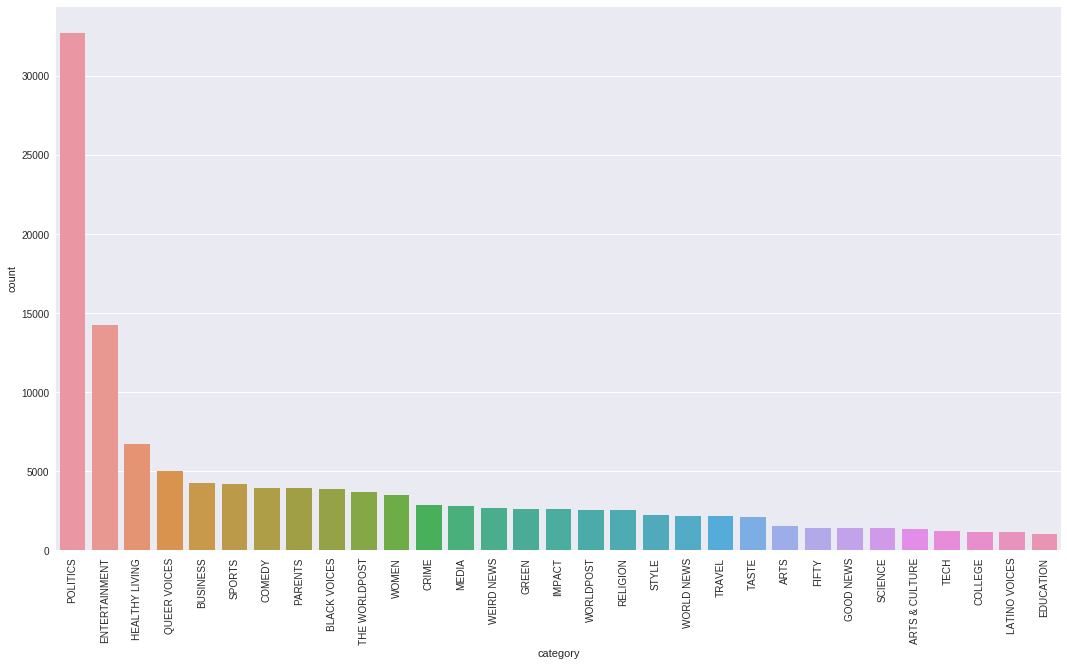

In [0]:
# plotting each catgoery and their observations
from matplotlib.pyplot import figure, show, xticks
width=18
height=10
# plot the graph in descending order of samples. 
desc_order=news['category'].value_counts().sort_values(ascending=False).index
figure(figsize=(width,height))
sns.countplot(x='category',data=news,order=desc_order)
xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

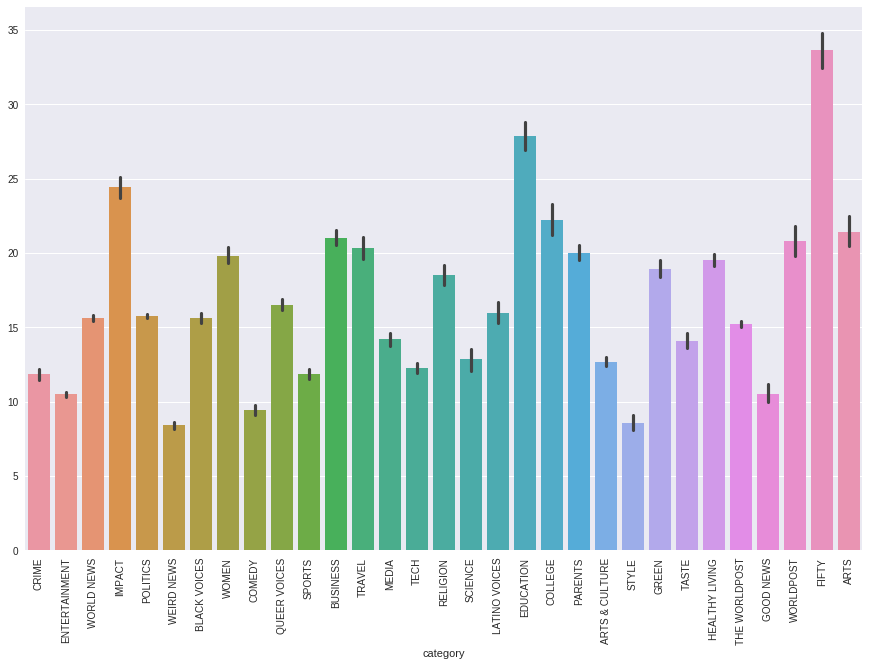

In [0]:
# finding count of words in descriptions.
word_count=[]
for words in news.short_description:
    word_length=len(words.split())
    word_count.append(word_length)
# setting figure size of the plot using pyplot.figure() method
plt.figure(figsize=(15,10))
# ploting bar graph
sns.barplot(x='category',y=word_count,data=news)
xticks(rotation=90)

# data preprocessing

In [0]:
# combining some raw data categories that are very close
news.category=news.category.map(lambda x:"WORLDPOST" if x=="THE WORLDPOST" else x)
news.category=news.category.map(lambda y:"ARTS & CULTURE" if y=="ARTS" or y=="ARTS & CULTURE" else y)
news.category=news.category.map(lambda z:"EDUCATION" if z=="EDUCATION" or z=="COLLEGE" else z) 
# replace empty values with NaN
news=news.replace("",np.NaN)
# drop rows with value as NaN
news.dropna(axis=0,inplace=True)
# removing rows with short_description size less than 7
mask=news['short_description'].str.len()>7
news=news.loc[mask]
# drop rows with category as 'WEIRD NEWS' and 'COMEDY'
indexnames=news[ (news['category']=='COMEDY') & (news['category']=='WEIRD NEWS') ].index
news.drop(indexnames,inplace=True)
# summarize the no of rows and columns in the dataset
print(news.shape)

(94909, 6)


In [0]:
# tokenization and stopwords removal
filtered_data=[]
# combines headline and short_description for the input
news['text']=news.headline+" "+news.short_description
news['text']=news['text'].str.lower()
# tokenizing each combined text into words
for each_word in news['text']:
    tokenized_word=word_tokenize(each_word)
    for each_one in tokenized_word:
        if each_one not in stopwords:
            filtered_data.append(each_one)

# print(filtered_data[0:300])
# len(filtered_data)


In [0]:
# removing punctuations and empty strings
import string
filtered_data=[''.join(temp for temp in each_one if temp not in string.punctuation) for each_one in filtered_data]
filtered_data=[each_one for each_one in filtered_data if each_one]
# print(filtered_data[0:10000])
# len(filtered_data)

In [0]:
# Remove punctuation from Unicode formatted strings.
import unicodedata
import sys
tbl = dict.fromkeys(i for i in range(sys.maxunicode)
                      if unicodedata.category(chr(i)).startswith('P'))
no_punct_data=[]
def remove_punctuation(text_data):
  for w in text_data:
    temp=w.translate(tbl)
    no_punct_data.append(temp)
#   return no_punct_data[0:10000]
remove_punctuation(filtered_data)
# delete empty items from list.
news_data=[each for each in no_punct_data if each]
# print(news_data[10000:20000])
len(news_data)


1715150

In [0]:
# import re
# news_clean_data=[]
# emoji_pattern = re.compile("["
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            "]+", flags=re.UNICODE)

# for i in news_data:
#     new_data=emoji_pattern.sub(r'',i)
#     news_clean_data.append(new_data)
# # print(news_data[10000:20000]) 
# news_clean_data=[each_one for each_one in news_clean_data if each_one]
# len(news_clean_data)   
    
    
    
# for c in no_emoji:
#     c=c.strip()
#     news_data.append(c)
# print(news_data[10000:20000])
# len(no_emoji_data)

1714490

In [0]:
# Lemmatization
lem=WordNetLemmatizer()
# from nltk.stem.porter import PorterStemmer
# stem=PorterStemmer()
lem_data=[]
for w in news_data:
  data_2=lem.lemmatize(w,'v')
  lem_data.append(data_2)
print(lem_data[10000:20000])
len(lem_data)
  

['alien', 'really', 'influence', 'fashion', 'choices', 'xfiles', 'universe', 'judge', 'overturn', 'california', 's', 'righttodie', 'law', 'state', 'attorney', 'general', 'five', 'days', 'file', 'emergency', 'appeal', 'challenge', 'rule', 'debbie', 'wasserman', 'schultz', 'nra', 'just', 'shy', 'terrorist', 'organization', 'gun', 'group', 'work', 'perpetuate', 'culture', 'violence', 'country', 'congresswoman', 'say', 'cardi', 'b', 'respond', 'girls', 'song', 'controversy', 'apologize', 'lgbtq', 'community', 'rapper', 'write', 'twitter', 'think', 'song', 'good', 'song', 'emotional', 'support', 'spider', 'goat', 'ban', 'american', 'airlines', 'airline', 'release', 'list', 'prohibit', 'animals', 'see', '40', 'percent', 'rise', 'onboard', 'companion', 'people', 'ca', 'nt', 'agree', 'whether', 'voice', 'say', 'yanny', 'laurel', 'voice', 'create', 'division', 'internet', 'see', 'since', 'infamous', 'dress', 'even', 'bottom', 'world', 's', 'deepest', 'ocean', 'trench', 'safe', 'plastic', 'bag',

1715150

1714490

In [0]:
# import emoji
# import re
# try:
#     uchr = unichr  # Python 2
#     import sys
#     if sys.maxunicode == 0xffff:
#         # narrow build, define alternative unichr encoding to surrogate pairs
#         # as unichr(sys.maxunicode + 1) fails.
#         def uchr(codepoint):
#             return (
#                 unichr(codepoint) if codepoint <= sys.maxunicode else
#                 unichr(codepoint - 0x010000 >> 10 | 0xD800) +
#                 unichr(codepoint & 0x3FF | 0xDC00)
#             )
# except NameError:
#     uchr = chr  # Python 3

# # Unicode 11.0 Emoji Component map (deemed safe to remove)
# _removable_emoji_components = (
#     (0x20E3, 0xFE0F),             # combining enclosing keycap, VARIATION SELECTOR-16
#     range(0x1F1E6, 0x1F1FF + 1),  # regional indicator symbol letter a..regional indicator symbol letter z
#     range(0x1F3FB, 0x1F3FF + 1),  # light skin tone..dark skin tone
#     range(0x1F9B0, 0x1F9B3 + 1),  # red-haired..white-haired
#     range(0xE0020, 0xE007F + 1),  # tag space..cancel tag
# )
# emoji_components = re.compile(u'({})'.format(u'|'.join([
#     re.escape(uchr(c)) for r in _removable_emoji_components for c in r])),
#     flags=re.UNICODE)

# news_data=[]
# def remove_emoji(filtered_data, remove_components=False):
#   for each in filtered_data:
#       cleaned = emoji.get_emoji_regexp().sub(u'', each)
#       news_data.append(cleaned)
#   if remove_components:
#       cleaned = emoji_components.sub(u'', cleaned)
#   print(len(news_data))
# remove_emoji(filtered_data)

In [0]:
# import unicodedata
# import sys
# tbl = dict.fromkeys(i for i in range(sys.maxunicode)
#                       if unicodedata.category(chr(i)).startswith('P'))
# cleaned_data=[]
# def remove_punctuation(text_data):
  
#   for w in text_data:
#     temp=w.translate(tbl)
#     cleaned_data.append(temp)
#   return cleaned_data
  
# text=['hello guys？','“༊I’m about to ask you for something and I’m being really formal and respectful.”',
#      '“༊”']
# remove_punctuation(text)
# new_data=[each for each in cleaned_data if each]
# print(new_data)


In [0]:
# new_data=[each for each in cleaned_data if each]
# print(new_data)

In [0]:
# for each in cleaned_data:
#   if each:
#     print(each)

In [0]:
# from nltk.stem import PorterStemmer
# # stemming of words
# ps=PorterStemmer()
# stemed_data=[]
# for w in news_data:
#     stemed_data.append(ps.stem(w))
# print(stemed_data[0:100])
# # print(data)


In [0]:
line = ['word','a','b','c','d','e','f','g','2','3']
for words in line:
    if len(words) == 1:
        line.remove(words)
print(line)
# it doesnt work as desired since v modify the list while iterating.never do this

['word', 'b', 'd', 'f', '2']


In [0]:
# here v use ist comprehension to remove single charcters from a list.
line = ['word','a','b','c','d','e','f','g','3','5']
line = [i for i in line if len(i) > 1]
print(line)

['word']


In [0]:
names=['jiss','ajith','b','dd']
names=[each for each in names if len(each)>2]
print(names)

['jiss', 'ajith']


In [0]:
import re
news_data=[]
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
new=['','','\U0001f602','ksjaks']
for i in new:
  new_data=emoji_pattern.sub(r'',i)
  news_data.append(new_data)
print(news_data)

['', '', '', 'ksjaks']


In [0]:
\U0001f602